# Final Project: Analysis of Two Museum Datasets

Name(NetID): Jenna Kim(jkim682) | Yingying Han(yh17) | Xinyu Huang(xinyuh10) 



## Data

We used three different datasets:

1) Two meseum datasets: Metropolitan & Indianapolis  
2) World Bank dataset:  
3) Ethnicity dataset:


## Data Preprocessing

1) We integrated two meseum datasets  
2) We merged two World bank datasets   
3) We merged two ethnicity datasets

## Load Data

### Yingying & Xinyu, you can work on the following processed datasets
#### Note: I integrated three .py scripts we had created for collecting data. Please see "museum_data.py" file.

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

file1 = "museum.csv"
file2 = "world_bank.csv"
file3 = "ethnicity.csv"
    
museum_df = pd.read_csv(file1, index_col=False, low_memory=False)
population_df = pd.read_csv(file2, index_col=False, low_memory=False)
ethnicity_df = pd.read_csv(file3, index_col=False, low_memory=False)

In [214]:
museum_df.tail()
museum_df.shape   # (485632, 15)

# population_df.head()
population_df.shape   # (263, 5)

# ethnicity_df.head()
ethnicity_df.shape   # (109, 2)

(109, 2)

## Analysis 1 : Distribution of artifacts by geographical information

### Within USA (By States)

In [220]:
museum_df_us = museum_df[museum_df['Country 1']=='United States']
museum_df_us.loc[:,('State 1')] = museum_df_us['State 1'].fillna('N/A')

In [221]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False).head(10)

State 1
N/A                 17784
Indiana               840
New York               80
California             72
New Mexico             59
Queens                 49
Pennsylvania           44
Massachusetts          43
Brooklyn               35
Lancaster County       33
dtype: int64

We exclude the objects from Indinan, because the museum is located in Indiana

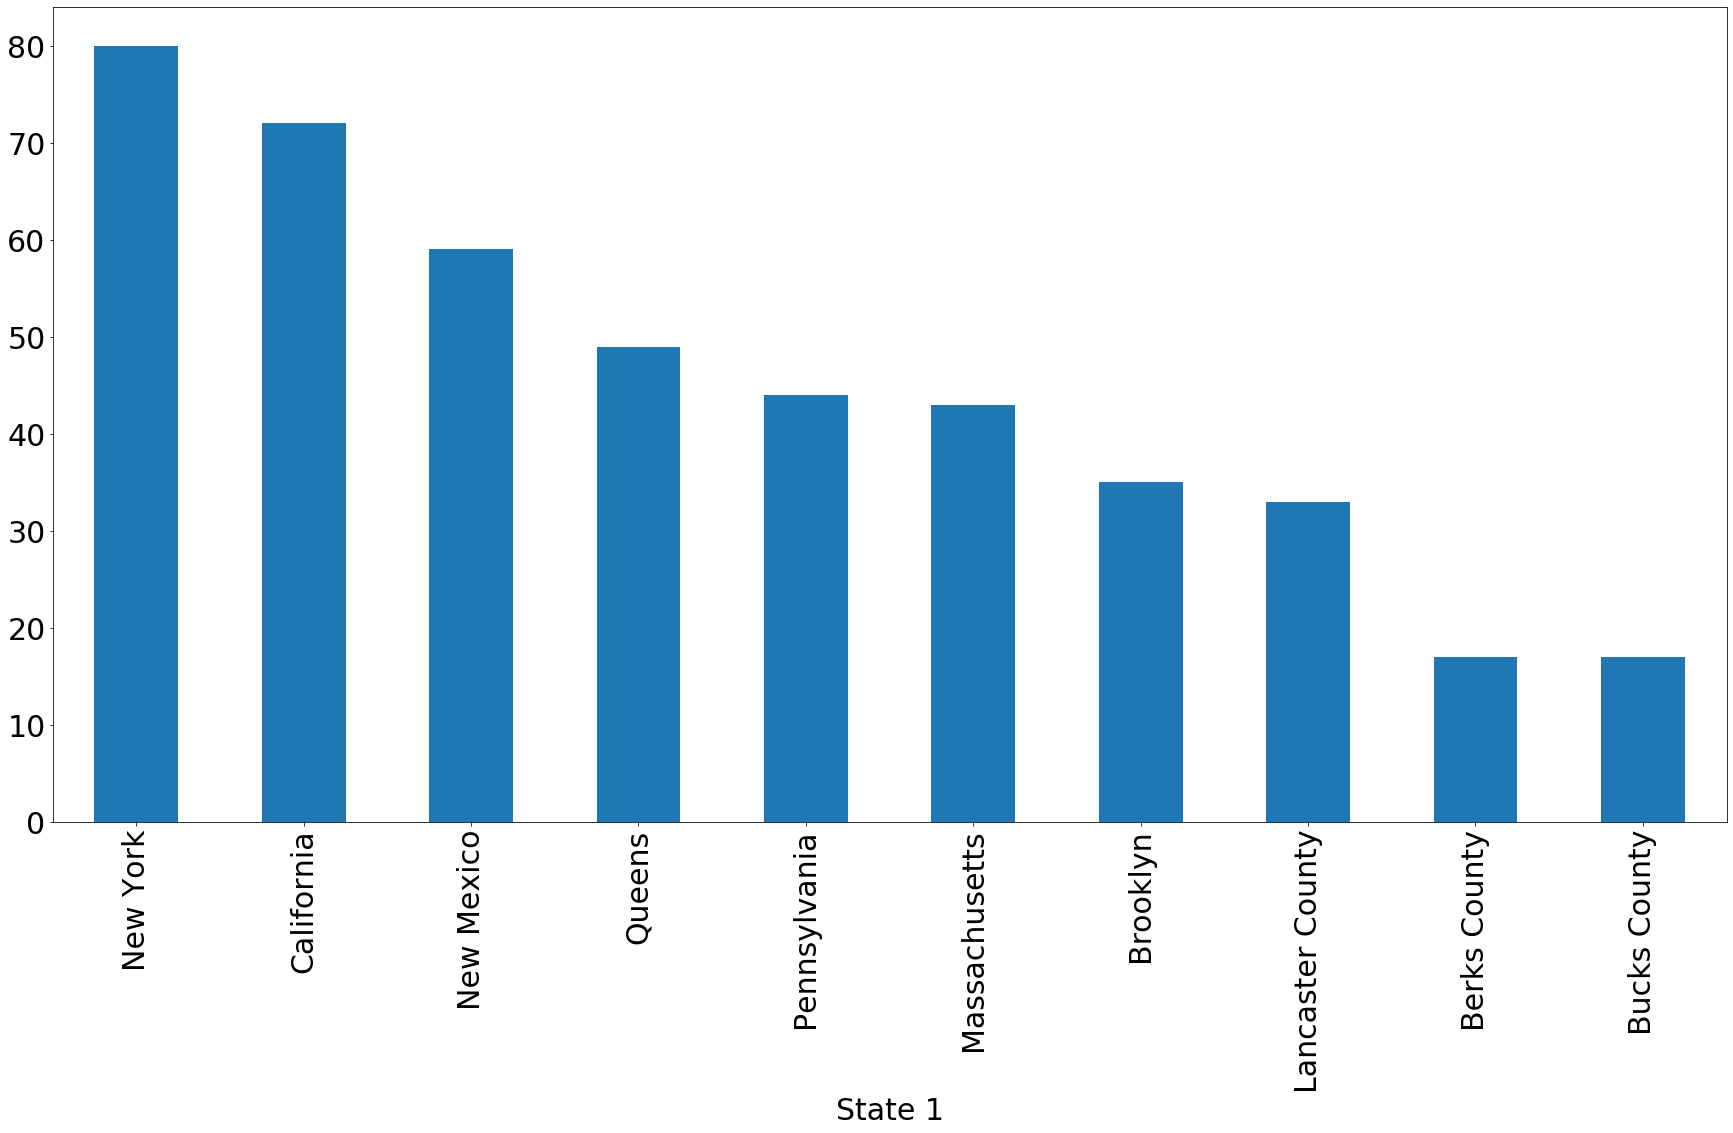

In [222]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False)[2:].head(10).plot.bar()

### Origin of Nations 

In [297]:
museum_df.loc[:,('Country 1')] = museum_df['Country 1'].fillna('N/A')
museum_df[museum_df['Country 1'] == "Côte d'Ivoire"] ="Cote d'Ivoire"
museum_group = museum_df.groupby("Country 1").size().sort_values(ascending=False).head(30).to_frame(name='Count')
museum_group

,Count
Country 1,
N/A,400557
Egypt,33324
United States,19298
Iran,6697
Peru,3431
France,2186
Mexico,1568
United Kingdom,1471
Indonesia,1441


In [ ]:
museum_population = pd.merge(museum_group, population_df, how='left', left_index=True, right_on='CountryName')
museum_population = museum_population[['CountryName','Count', 'Population']]
museum_population.reset_index(drop=True, inplace=True)
museum_population   
for index,row in museum_population.iterrows():
    if pd.isnull(row['Population']) == True:
        name = row['CountryName']
        if name != "N/A":
            full_name = population_df[population_df['CountryName'].str.contains(name)]
            population = population_df[population_df['CountryName'].str.contains(name)]
            museum_population.loc[index,['CountryName']]= full_name['CountryName'].iloc[0]
            museum_population.loc[index,['Population']]= population['Population'].iloc[0]
            print(museum_population.loc[index,['CountryName']])
museum_population   

In [298]:
## Analysis 2: Distribution of artifacts by time

CountryName    Egypt, Arab Rep.
Name: 1, dtype: object
CountryName    Iran, Islamic Rep.
Name: 3, dtype: object
CountryName    Congo, Dem. Rep.
Name: 16, dtype: object
CountryName    Syrian Arab Republic
Name: 17, dtype: object


,CountryName,Count,Population
0,N/A,400557,NaN
1,"Egypt, Arab Rep.",33324,9.842360e+07
2,United States,19298,3.266875e+08
3,"Iran, Islamic Rep.",6697,8.180027e+07
4,Peru,3431,3.198926e+07
5,France,2186,6.697711e+07
6,Mexico,1568,1.261908e+08
7,United Kingdom,1471,6.646034e+07
8,Indonesia,1441,2.676634e+08
9,India,1429,1.352617e+09


,CountryName,CountryCode,Population,Region,Income


## Analysis 2: Distribution of artifacts by time

# Basic year inspection before analysis:


## (1) How many rows in all in thie file? 

486732

## (2) How many rows do not have year value (nan)?

2390

## (3) How many unique year values are there (exclude nan value)?
2044

## (4) What is the year range?
from year 400000 BC to 2020 AD.

In [4]:
object_year_df = pd.read_csv ("museum.csv" ,usecols = ["ObjectID","ObjectBeginDate"])


In [5]:
object_year_df.shape

(485632, 2)

In [6]:
# How many cells do not have year information?
object_year_df["ObjectBeginDate"].isnull().sum()

2390

In [7]:
object_year_df = object_year_df.dropna(subset = ["ObjectBeginDate"]).astype(np.int64)

In [8]:
object_year_df.shape

(483242, 2)

In [9]:
object_year_df["ObjectBeginDate"].unique()
len(object_year_df["ObjectBeginDate"].unique())

2044

In [10]:
# object_year_df.groupby("ObjectBeginDate").size()

In [11]:
# Drop two rows the object year is "5000"
object_year_df = object_year_df[object_year_df["ObjectBeginDate"]!=5000]
object_year_df.shape

(483240, 2)

# (5) How many objects were created before year zero (before Christ (BC)), in the year zero, and after year zero (anno Domini (AD))?

In [12]:
year_inspection = {}
number_of_objects_bc = object_year_df[object_year_df["ObjectBeginDate"]<0].shape[0]
number_of_object_year_zero = object_year_df[object_year_df["ObjectBeginDate"]==0].shape[0]
number_of_object_ad = object_year_df[object_year_df["ObjectBeginDate"]>0].shape[0]
year_inspection["BC"]=number_of_objects_bc
year_inspection["Year Zero"] = number_of_object_year_zero
year_inspection["AD"]=number_of_object_ad
print(year_inspection)

{'BC': 66671, 'Year Zero': 1253, 'AD': 415316}


# (To be discussed), how to add the number label to the bar? Otherwise, it looks like there were no object created in year zero.

# Brief summary:
## 66671 objects were created before BC, year value range from year -400000 to year -1
## 415316 object were created after year Zero, year value range from year 1 to year 2020.
## Though small amount of objects were created before Year Zero, the year values have a wide range (-400000,-1).
## There are a huge amount of objects were created after Year Zero (# 415316), however, the year values cover from year 1 to year 2020 only.

In [13]:
plt.rcParams['figure.figsize']=(30,15)
plt.rcParams.update({'font.size': 30})

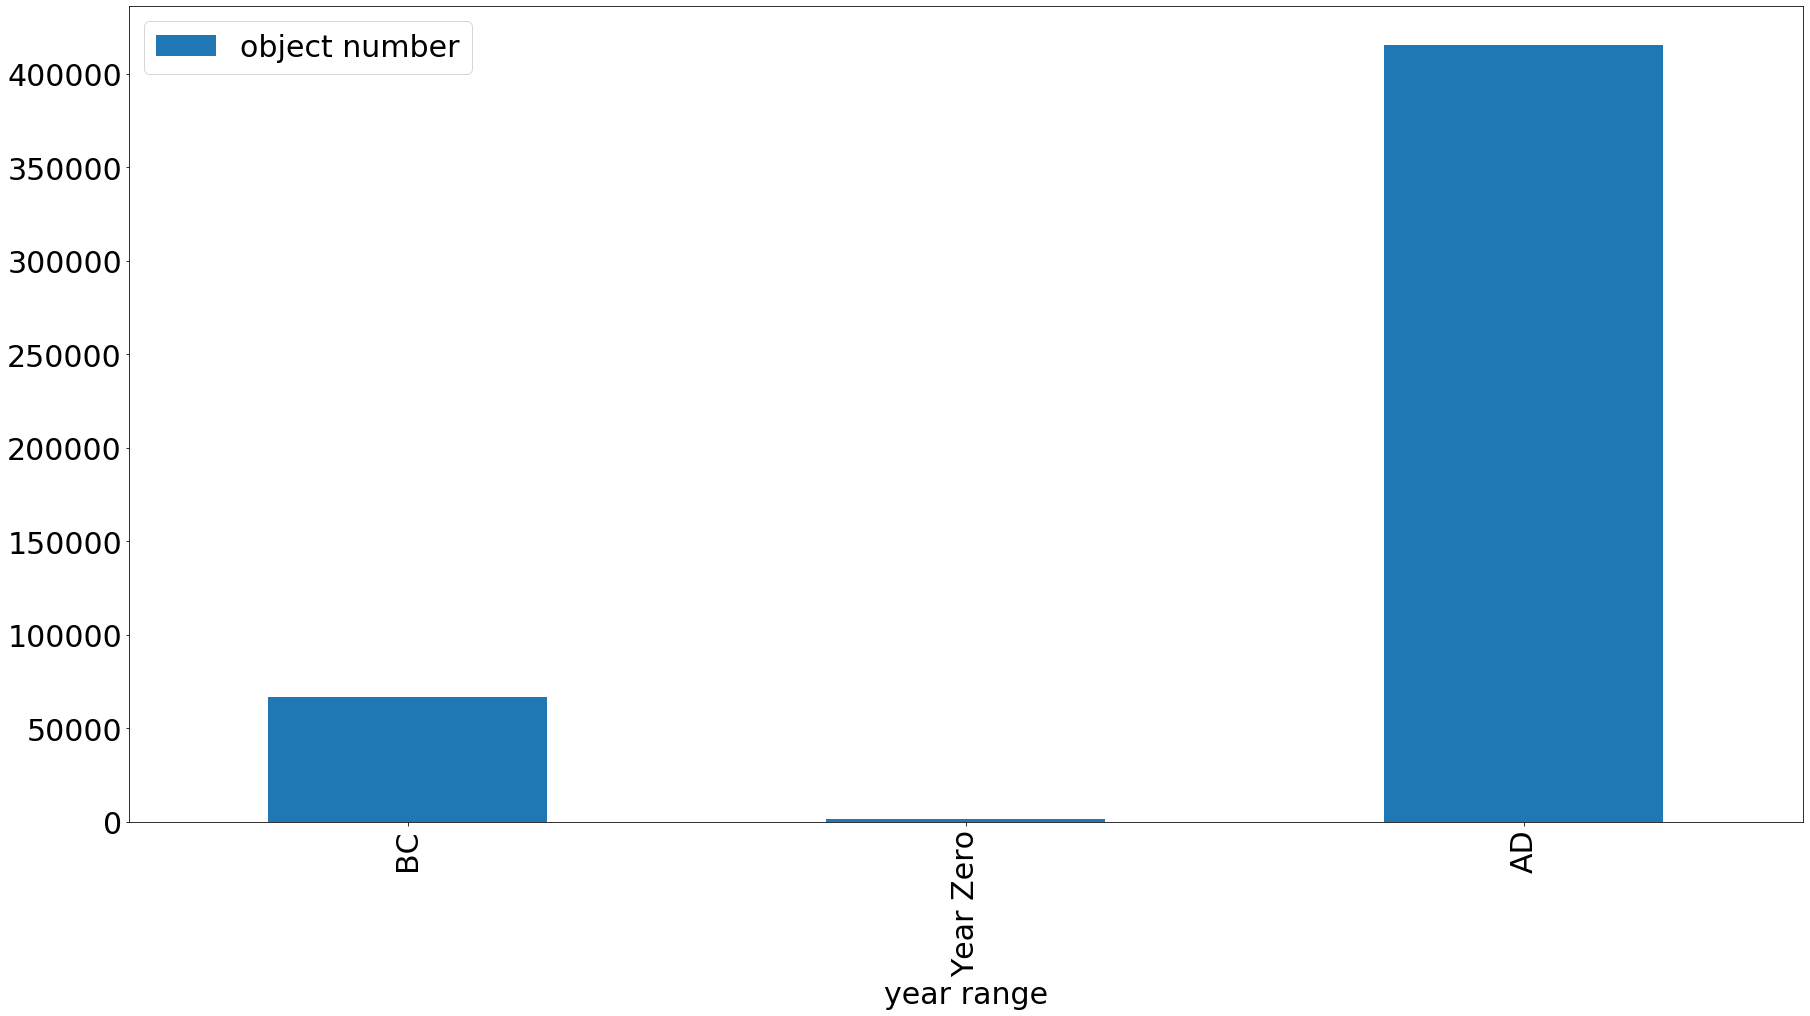

In [14]:
year_inspection_pd = pd.DataFrame.from_dict(data = year_inspection,orient = "index", columns = ["object number"])
year_inspection_pd.index.name = "year range"
year_inspection_pd
year_inspection_pd.plot.bar(y="object number")

In [15]:
number_unique_year_bc = len(object_year_df[object_year_df["ObjectBeginDate"]<0]["ObjectBeginDate"].unique())
number_unique_year_ad = len(object_year_df[object_year_df["ObjectBeginDate"]>0]["ObjectBeginDate"].unique())
number_unique_year_ad

1316

In [16]:
object_year_before_zero_df=object_year_df[object_year_df["ObjectBeginDate"]<0]
# object_year_before_zero_df

object_year_before_zero_list = object_year_before_zero_df["ObjectBeginDate"].tolist()
len(object_year_before_zero_list)


66671

# This is a function categorize the year values which are smaller than 0.
## Years that are before year zero are further categorized into 5 types:
## (1) before 10,000BC
## (2) 10,000 BC - 7500BC
## (3) 7500 BC - 5000BC
## (4) 5000 BC - 2500 BC
## (5) 2500 BC - 0

In [17]:
def categorize_bc_years(bc_year:list)->dict:
    bc_categories_dic = {"1": (-400000,-10000),
        "2": (-10000,-7500),
        "3": (-7500,-5000),
        "4": (-5000,-2500),
        "5": (-2500,0)}
    a=[]# -400000,-10000
    b=[]# -10000,750
    c=[]# -7500,-5000
    d=[]# -5000,-2500
    e=[]# -2500,0
    bc_category_distribution = {}
    
    for object_year in bc_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            bc_category_distribution["before 10000BC"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            bc_category_distribution["10000BC to 7500BC"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            bc_category_distribution["7500BC to 5000BC"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            bc_category_distribution["5000BC to 2500BC"] = len(d)
        
        else:
            e.append(object_year)
            bc_category_distribution["2500BC to Year 0"] = len(e)

    return(bc_category_distribution)

In [18]:
bc_year_dictionary = categorize_bc_years(object_year_before_zero_list)
bc_year_dictionary

{'2500BC to Year 0': 61760,
 'before 10000BC': 38,
 '5000BC to 2500BC': 3144,
 '10000BC to 7500BC': 11,
 '7500BC to 5000BC': 1718}

In [19]:
# Source: https://stackoverflow.com/questions/52139110/how-to-change-the-order-of-keys-in-a-python-3-5-dictionary-using-another-list-a
key_order =["before 10000BC","10000BC to 7500BC","7500BC to 5000BC","5000BC to 2500BC","2500BC to Year 0"]
bc_year_dictionary_sorted= {k : bc_year_dictionary[k] for k in key_order}
bc_year_dictionary_sorted

{'before 10000BC': 38,
 '10000BC to 7500BC': 11,
 '7500BC to 5000BC': 1718,
 '5000BC to 2500BC': 3144,
 '2500BC to Year 0': 61760}

In [20]:
distribution_df = pd.DataFrame.from_dict(bc_year_dictionary_sorted,
                                              orient='index',
                                              columns = ["object number"])

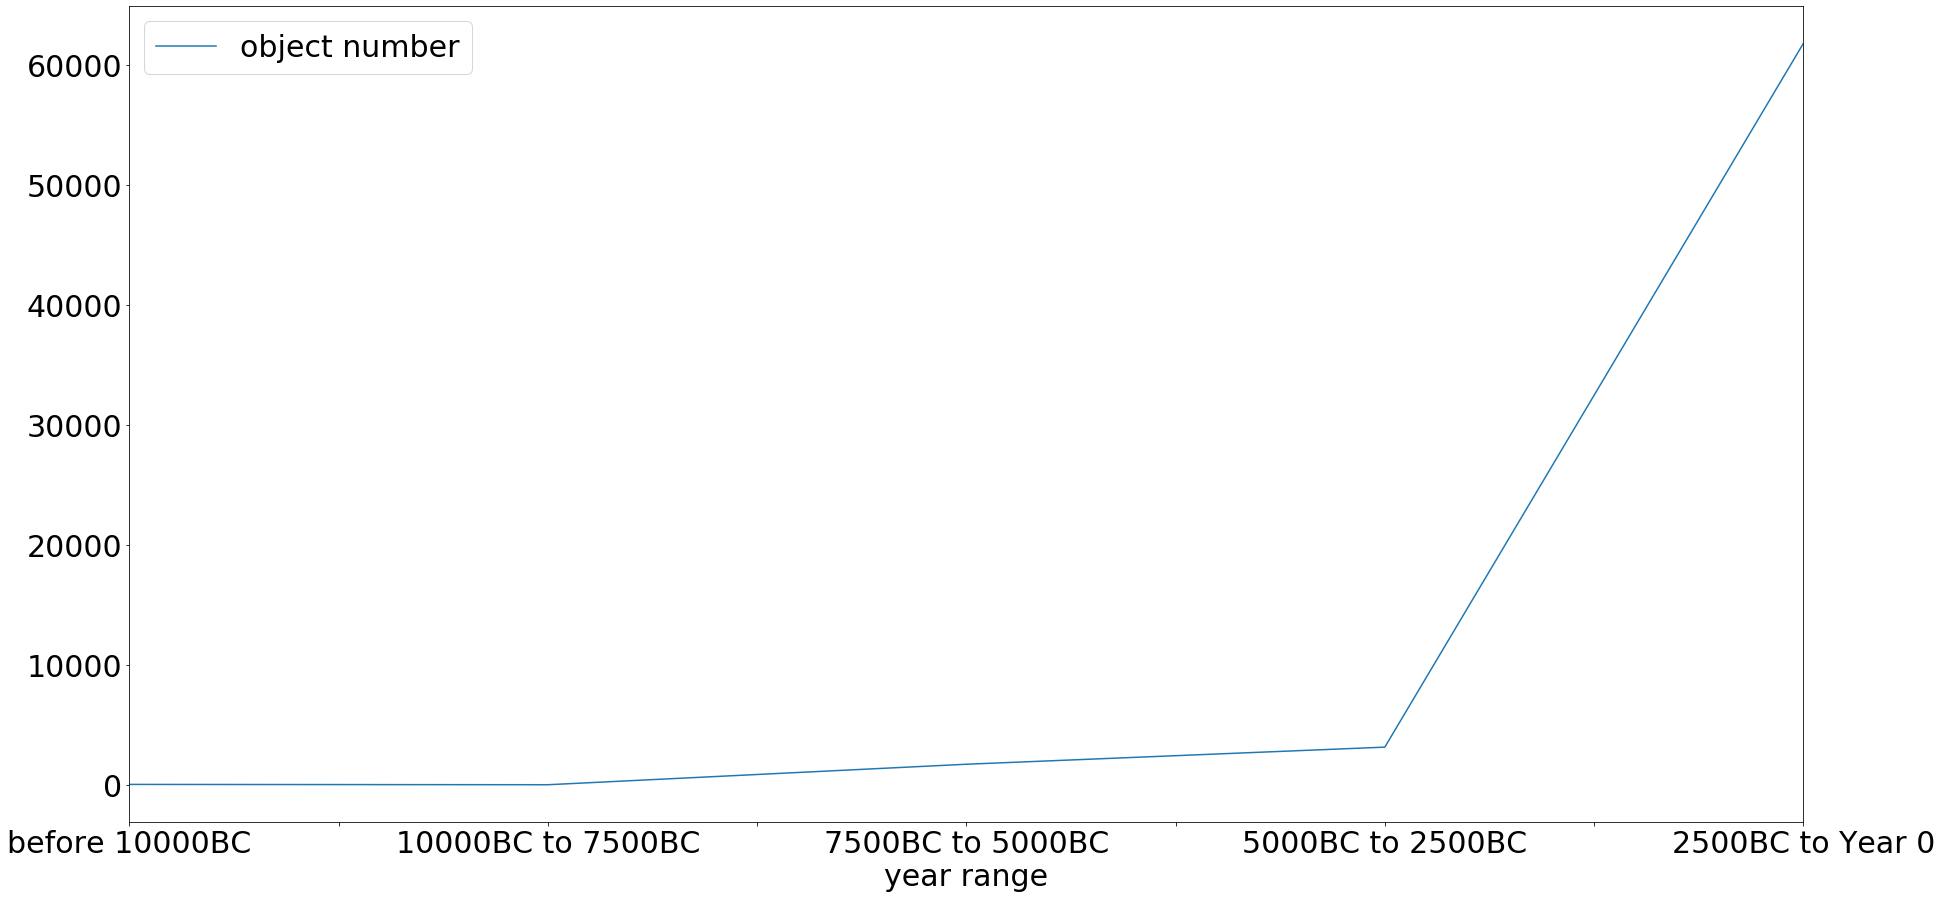

In [21]:
distribution_df.index.name = "year range"

distribution_df.plot(y="object number")

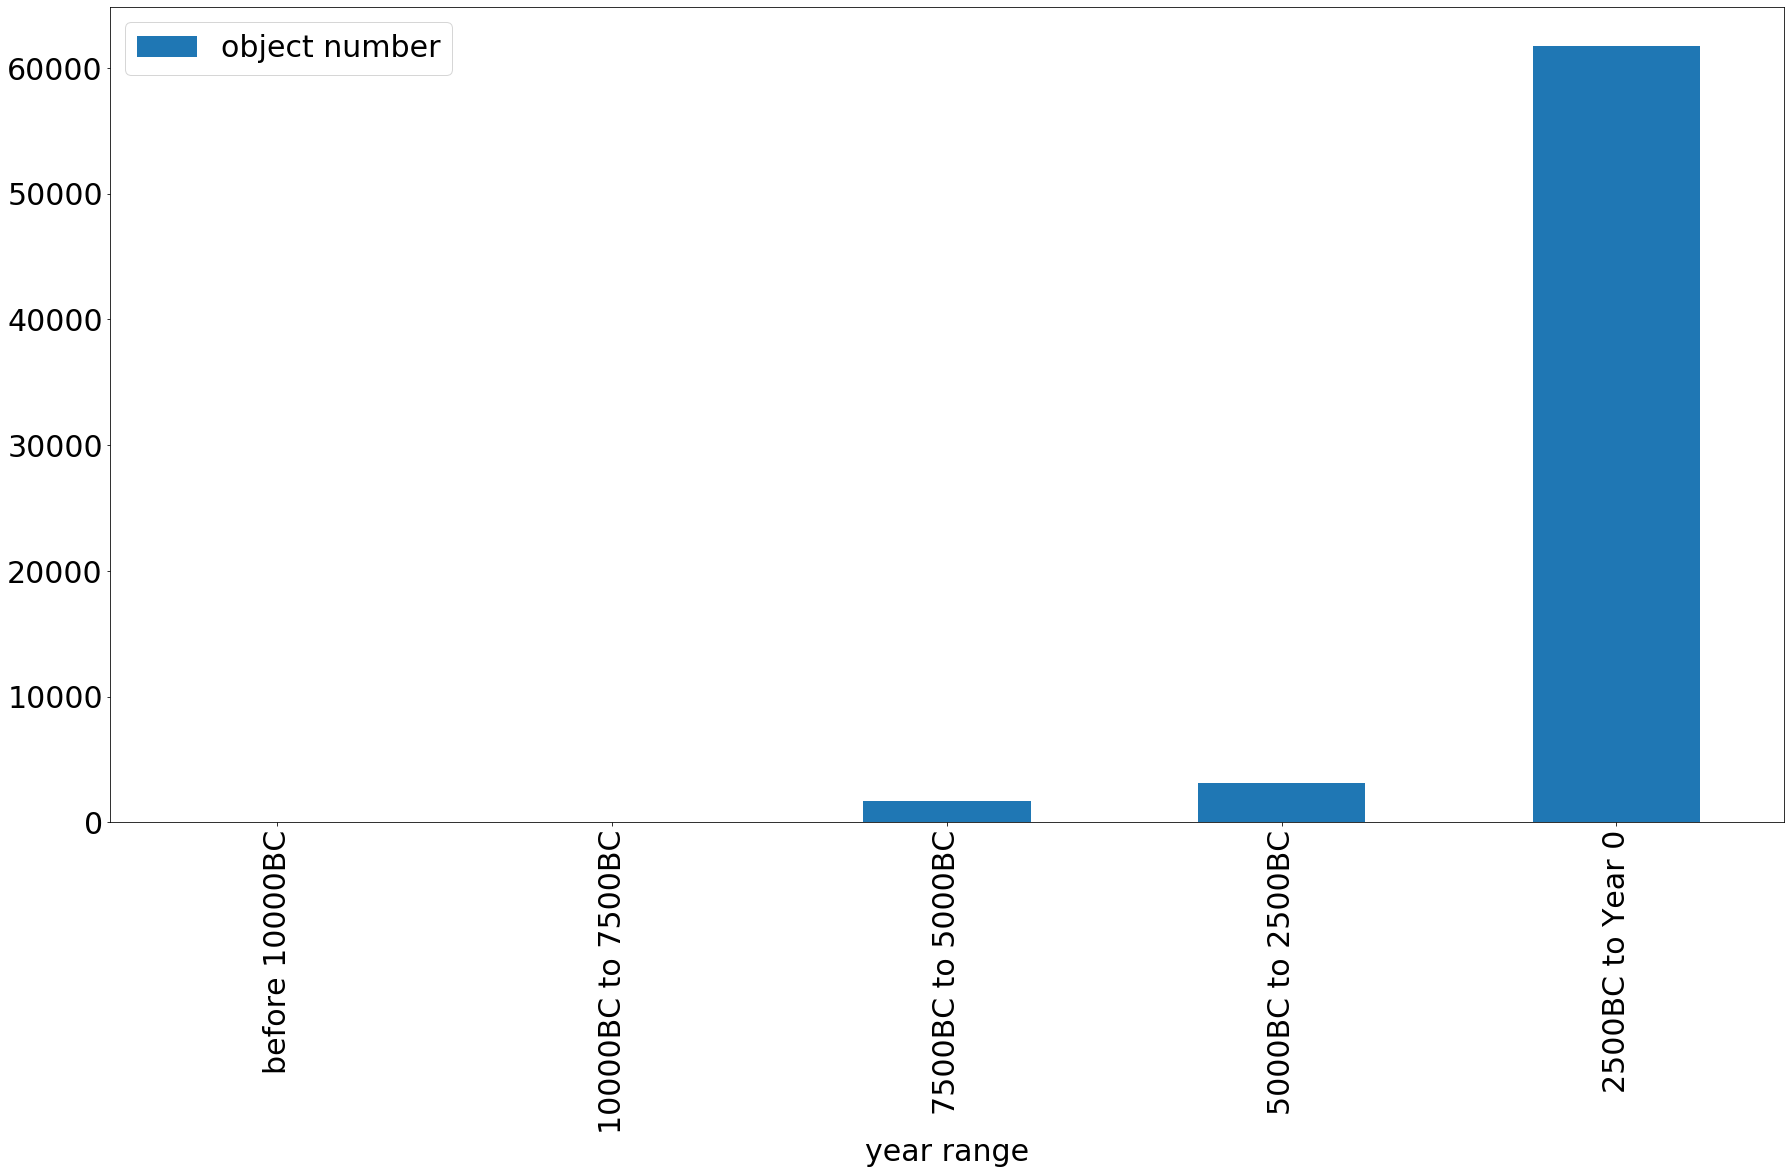

In [22]:
distribution_df.plot.bar(y="object number")

# From the above two graphs, we can see that for those objects which were created before year zero as well as collected by museums, most of them were created between 2500 BC and year Zero. 

In [23]:
object_year_after_zero_df=object_year_df[object_year_df["ObjectBeginDate"]>0]
# object_year_after_zero_df

# This is a function convert year value to century value.

In [24]:
def year_to_century(year:list) ->list:
    century = []
    for year_value in year:
        if year_value > 0:
            century_value = int(year_value/100)+1
            century.append(century_value)
        elif year_value == 0:
            century_value = 0
            century.append(century_value)
        else:
            century_value = int(year_value/100)-1
            century.append(century_value)
    return(century)

In [25]:
object_year_after_zero_list = object_year_after_zero_df["ObjectBeginDate"].tolist()

In [26]:
len(object_year_after_zero_list)

415316

In [27]:
object_century_after_zero_list = year_to_century(object_year_after_zero_list)
# object_century_after_zero_list

In [28]:
#Source: https://stackoverflow.com/questions/20665232/how-to-plot-the-number-of-times-each-element-is-in-a-list
counts_after_zero = Counter(object_century_after_zero_list)

In [29]:
counts_after_zero

Counter({19: 133244,
         20: 113146,
         17: 34489,
         18: 61983,
         16: 29655,
         14: 3758,
         15: 7437,
         12: 3011,
         1: 2829,
         3: 2082,
         7: 2047,
         4: 2168,
         6: 2046,
         5: 1250,
         13: 2737,
         8: 2246,
         11: 1351,
         9: 3565,
         2: 1518,
         10: 2050,
         21: 2704})

In [30]:
import collections
# Source: https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
counts_after_zero_sorted = collections.OrderedDict(sorted(counts_after_zero.items()))
counts_after_zero_sorted

OrderedDict([(1, 2829),
             (2, 1518),
             (3, 2082),
             (4, 2168),
             (5, 1250),
             (6, 2046),
             (7, 2047),
             (8, 2246),
             (9, 3565),
             (10, 2050),
             (11, 1351),
             (12, 3011),
             (13, 2737),
             (14, 3758),
             (15, 7437),
             (16, 29655),
             (17, 34489),
             (18, 61983),
             (19, 133244),
             (20, 113146),
             (21, 2704)])

In [31]:
ad_century_distribution_df = pd.DataFrame.from_dict(counts_after_zero_sorted,orient='index',
                                              columns = ["object number"])
ad_century_distribution_df.index.name = "century"

In [32]:
century_percent_list = []
for object_number_by_century in counts_after_zero_sorted.values():
    
    object_percent = object_number_by_century/415316*100
    
    century_percent_list.append(object_percent)
print(century_percent_list)

[0.6811680744300724, 0.3655048204258926, 0.5013050303865009, 0.5220121546003524, 0.30097564264319215, 0.4926369318783769, 0.4928777123924915, 0.5407930347012877, 0.8583825328183841, 0.4936000539348352, 0.3252944745687621, 0.7249901279989213, 0.6590162671315336, 0.904853172042493, 1.7906846834699361, 7.140346146067091, 8.304279151296843, 14.924298606362385, 32.082558822679594, 27.2433520500053, 0.6510705101657533]


In [33]:
ad_century_distribution_df["object_percent"]=century_percent_list

In [34]:
ad_century_distribution_df

,object number,object_percent
century,,
1,2829,0.681168
2,1518,0.365505
3,2082,0.501305
4,2168,0.522012
5,1250,0.300976
6,2046,0.492637
7,2047,0.492878
8,2246,0.540793
9,3565,0.858383


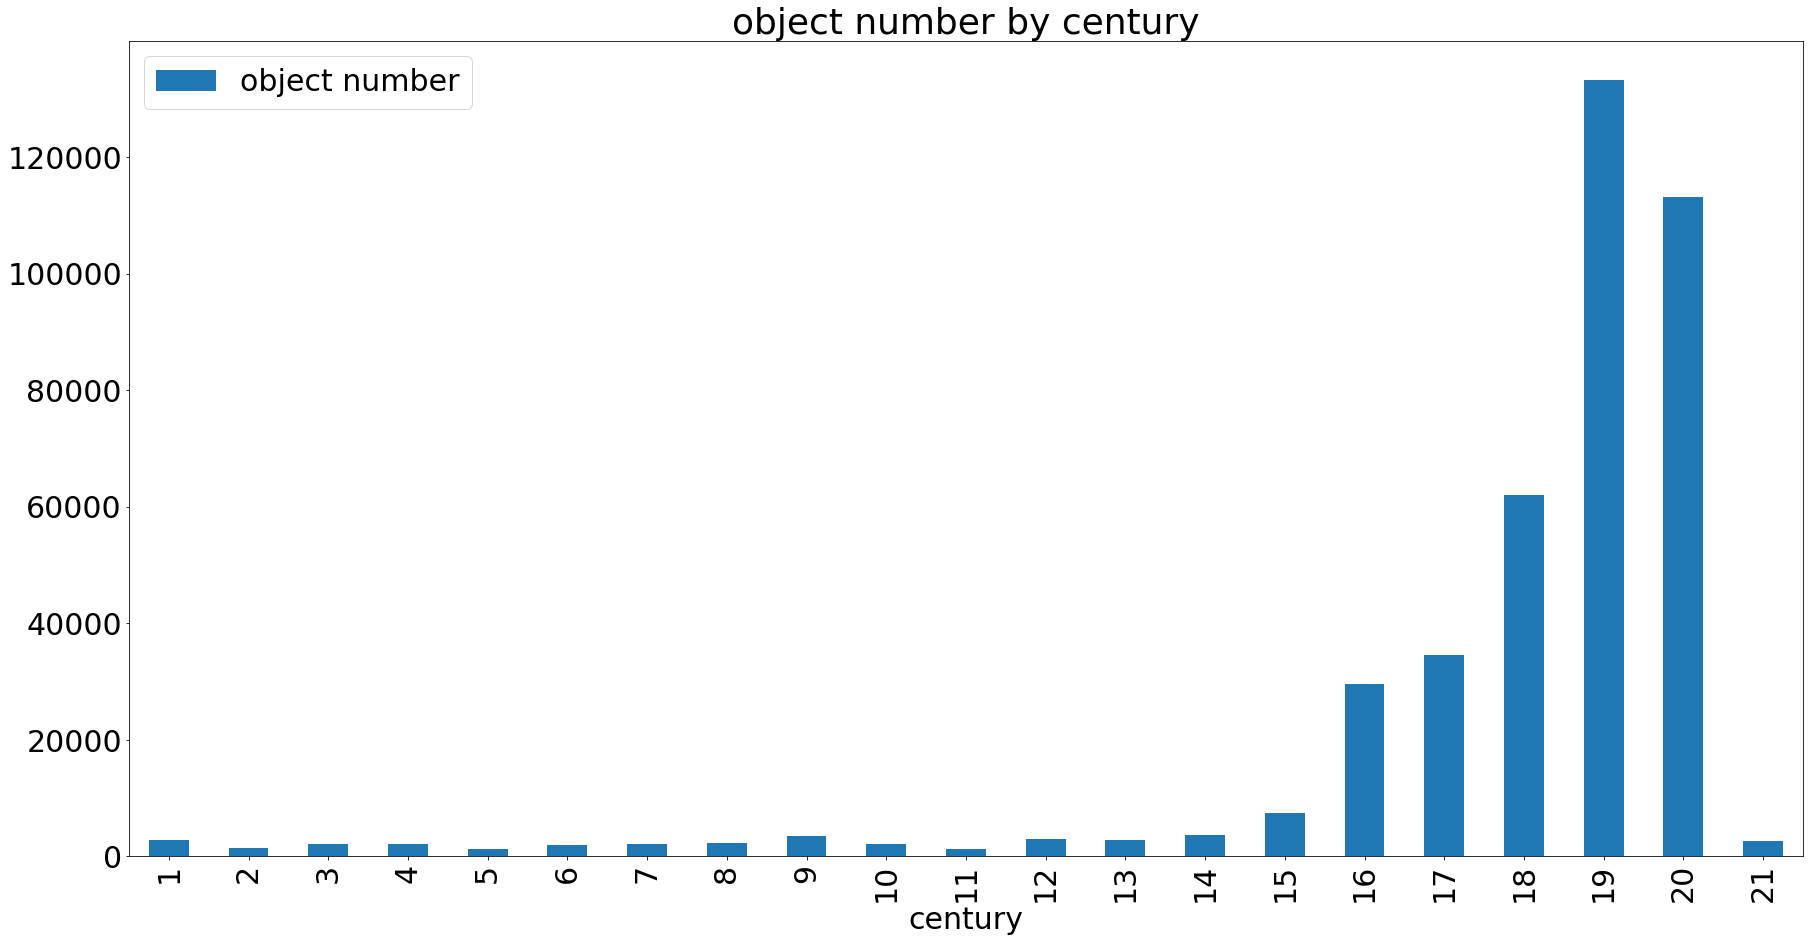

In [35]:
ad_century_distribution_df.plot.bar(y="object number",title = "object number by century")

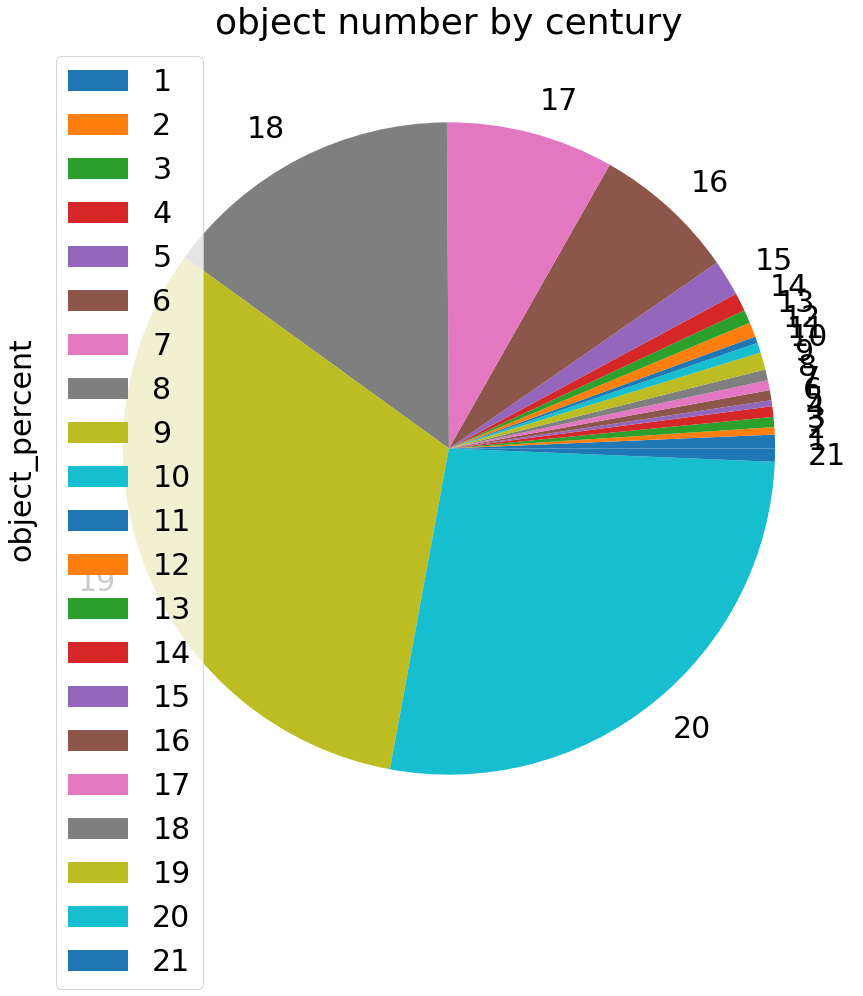

In [36]:
ad_century_distribution_df.plot.pie(y="object_percent",title = "object number by century")